**Kafein İçeriği- EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
Caffeine = pd.read_csv('caffeine.csv')
Caffeine.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [4]:
Caffeine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [5]:
Caffeine[Caffeine.Calories == 0]

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
9,TrueStart Performance Coffee,150.824850,0,95,Coffee
...,...,...,...,...,...
604,Limitless Sparkling Water,354.882000,0,35,Water
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water


In [6]:
Caffeine['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

Kalori ve kafein değerlerini kalori/300 ml ve kafein/300 ml olarak dönüştürme.

In [7]:
Caffeine['Calories/300ml'] = Caffeine['Calories']*300/Caffeine['Volume (ml)']
Caffeine['Caffeine (mg)/300ml'] = Caffeine['Caffeine (mg)']*300/Caffeine['Volume (ml)']
Caffeine.drop('Volume (ml)',axis=1,inplace=True)
Caffeine.drop('Calories',axis=1,inplace=True)
Caffeine.drop('Caffeine (mg)',axis=1,inplace=True)

In [8]:
Caffeine.head()

,drink,type,Calories/300ml,Caffeine (mg)/300ml
0,Costa Coffee,Coffee,0.000000,323.354211
1,Coffee Friend Brewed Coffee,Coffee,0.000000,173.866603
2,Hell Energy Coffee,Coffee,179.862003,119.908002
3,Killer Coffee (AU),Coffee,0.000000,515.604408
4,Nescafe Gold,Coffee,0.000000,79.139281


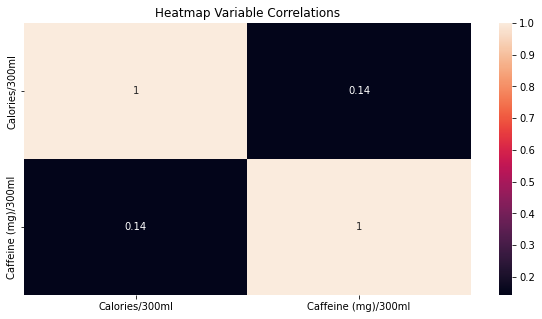

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(Caffeine.corr(),annot=True)
plt.title('Heatmap Variable Correlations')
plt.show()

 Kalorilerin kafeinle hafif negatif korelasyonu.

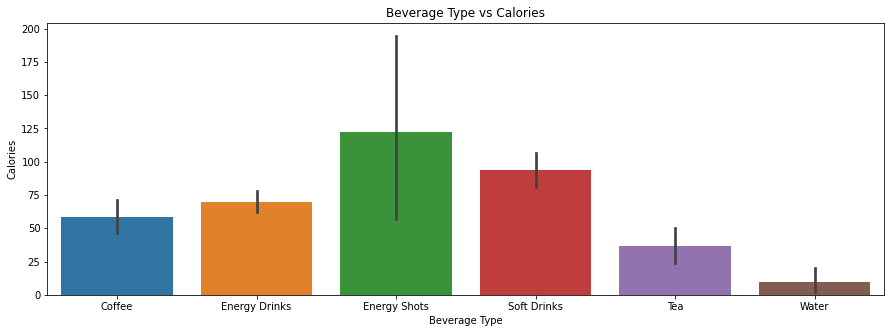

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='type',y='Calories/300ml',data=Caffeine)
plt.title('Beverage Type vs Calories')
plt.xlabel('Beverage Type')
plt.ylabel('Calories')
plt.show()

Enerji içecekleri hem kafein hem de kalori açısından listenin başında gelir.

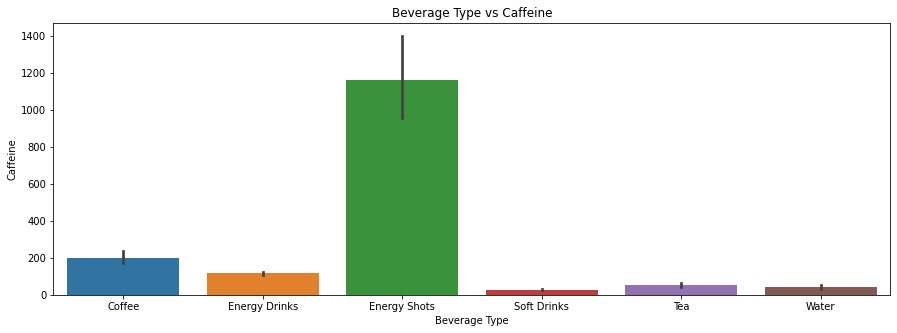

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x='type',y='Caffeine (mg)/300ml',data=Caffeine)
plt.title('Beverage Type vs Caffeine')
plt.xlabel('Beverage Type')
plt.ylabel('Caffeine')
plt.show()

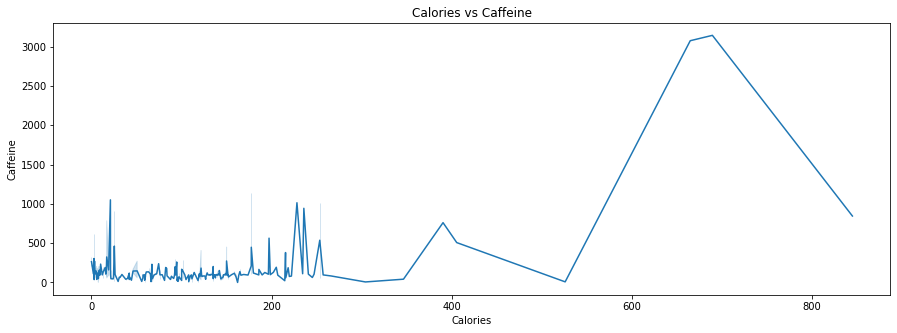

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Calories/300ml',y='Caffeine (mg)/300ml',data=Caffeine)
plt.title('Calories vs Caffeine')
plt.xlabel('Calories')
plt.ylabel('Caffeine')
plt.show()

In [13]:
Caffeine_clust = Caffeine.drop(['drink','type'],axis=1)
Caffeine_clust.head()

,Calories/300ml,Caffeine (mg)/300ml
0,0.000000,323.354211
1,0.000000,173.866603
2,179.862003,119.908002
3,0.000000,515.604408
4,0.000000,79.139281


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler =StandardScaler()
col = Caffeine_clust.columns
Caffeine_clust = scaler.fit_transform(Caffeine_clust)
Caffeine_clust = pd.DataFrame(Caffeine_clust,columns=col)
Caffeine_clust.head()

,Calories/300ml,Caffeine (mg)/300ml
0,-0.760405,0.444142
1,-0.760405,-0.014119
2,1.281608,-0.179532
3,-0.760405,1.033495
4,-0.760405,-0.304511


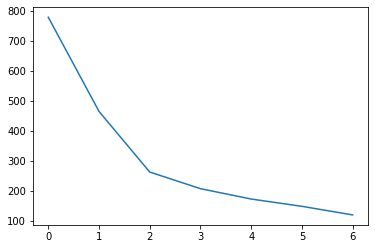

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Caffeine_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [18]:
Caffeine.head()

,drink,type,Calories/300ml,Caffeine (mg)/300ml
0,Costa Coffee,Coffee,0.000000,323.354211
1,Coffee Friend Brewed Coffee,Coffee,0.000000,173.866603
2,Hell Energy Coffee,Coffee,179.862003,119.908002
3,Killer Coffee (AU),Coffee,0.000000,515.604408
4,Nescafe Gold,Coffee,0.000000,79.139281


In [20]:
Caffeine['Cluster_ID'] = kmeans.labels_

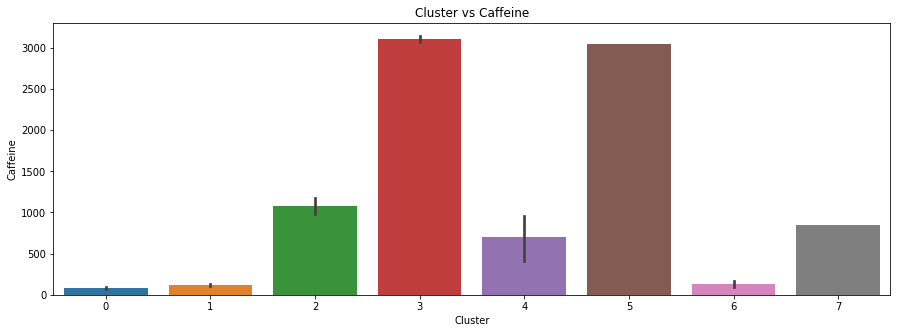

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Caffeine (mg)/300ml',data=Caffeine)
plt.title('Cluster vs Caffeine')
plt.xlabel('Cluster')
plt.ylabel('Caffeine')
plt.show()

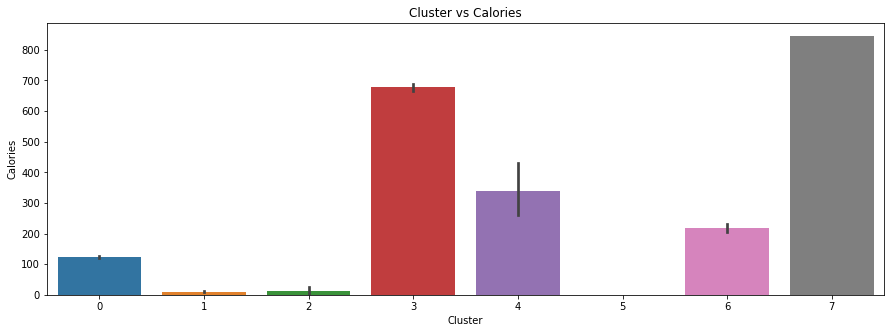

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Calories/300ml',data=Caffeine)
plt.title('Cluster vs Calories')
plt.xlabel('Cluster')
plt.ylabel('Calories')
plt.show()

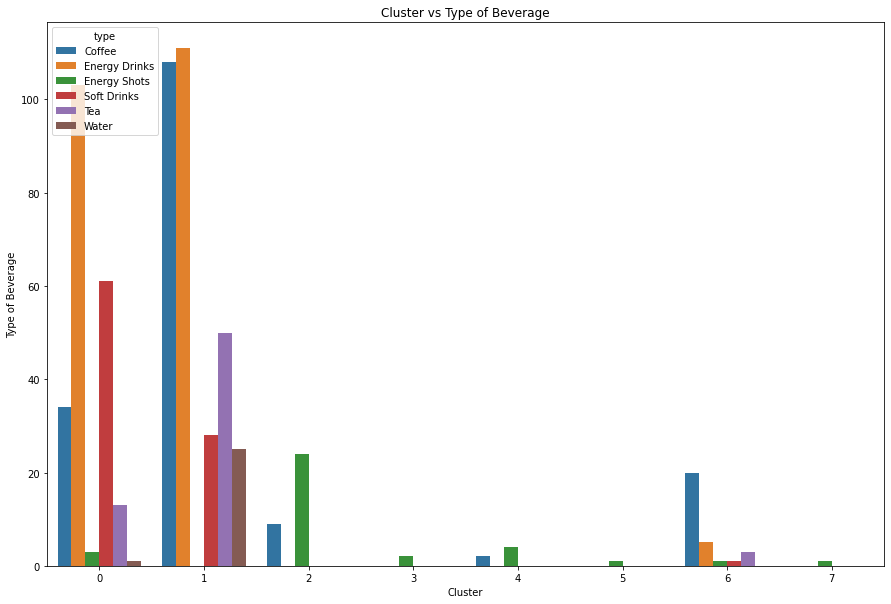

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='Cluster_ID',hue='type',data=Caffeine)
plt.title('Cluster vs Type of Beverage')
plt.xlabel('Cluster')
plt.ylabel('Type of Beverage')
plt.show()

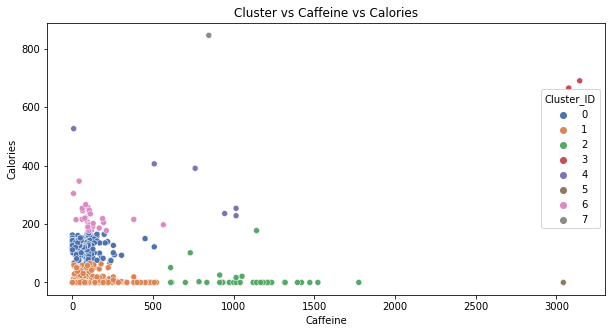

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Caffeine (mg)/300ml',y='Calories/300ml',hue='Cluster_ID',palette='deep',data=Caffeine)
plt.title('Cluster vs Caffeine vs Calories')
plt.xlabel('Caffeine')
plt.ylabel('Calories')
plt.show()